In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score

### Importing the Dataset

In [24]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [25]:
df.shape

(8124, 23)

In [26]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [27]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

This shows that there are no null values present in our dataset.

In [28]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Name of each feature present in our dataset

In [29]:
df.info()    #count,type,null count of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Univariant , Bivariant ,Multivariant Analysis

In [30]:
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

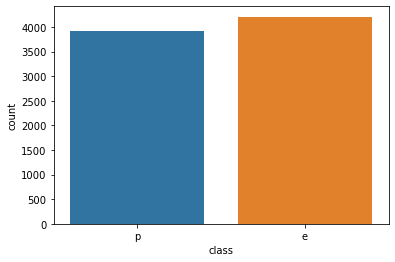

In [31]:
sns.countplot(df["class"])

As class is our output variable which has 2 categories i.e p(posionous) and e(edible).
The count of each class p:3916 and e:4208 as the difference between both the categories is not much we can say that
variable balancing is not required.

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

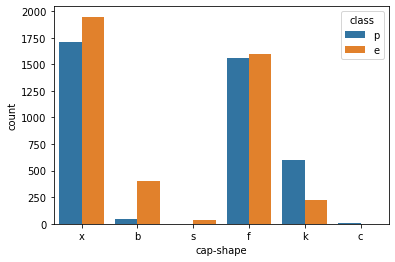

In [32]:
sns.countplot(x="cap-shape",hue="class",data=df)

<AxesSubplot:xlabel='cap-color', ylabel='count'>

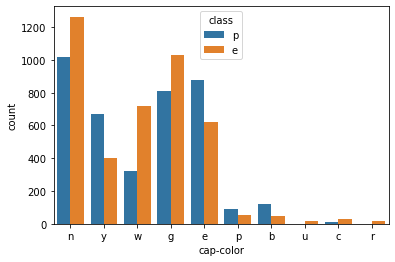

In [33]:
sns.countplot(x="cap-color",hue="class",data=df)

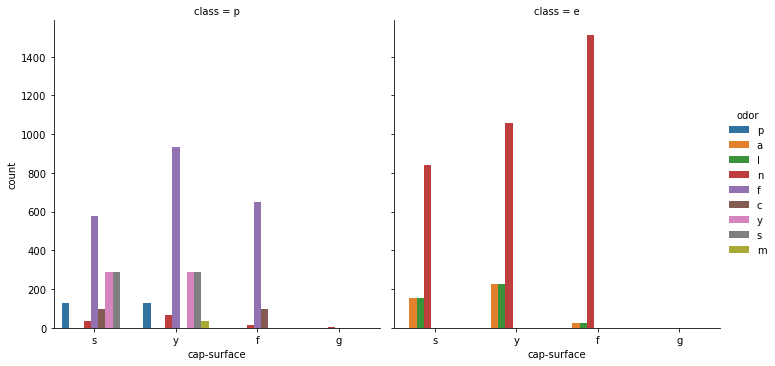

In [34]:
sns.catplot(x="cap-surface",hue="odor",col="class",data=df,kind="count")

<AxesSubplot:xlabel='gill-spacing', ylabel='count'>

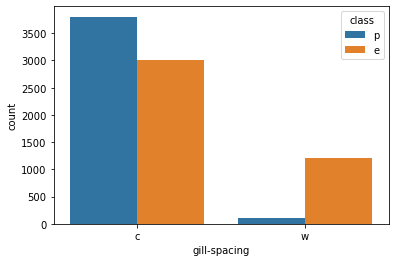

In [35]:
sns.countplot(x="gill-spacing",hue="class",data=df)

If the gill-spacing is c:close its poisionous to eat and if the gill-spacing is w:crowded then its edibile to eat.

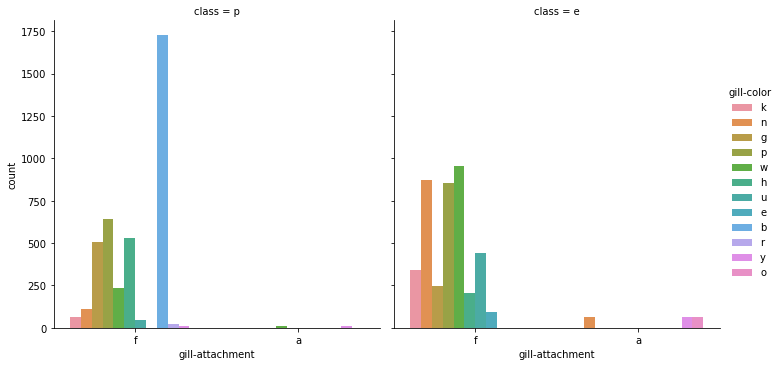

In [36]:
sns.catplot(x="gill-attachment",hue="gill-color",col="class",data=df,kind="count")

From above we can depict that, If the gill-attachment is f:free and gill-color is b:buff then its highly poisionous to eat.

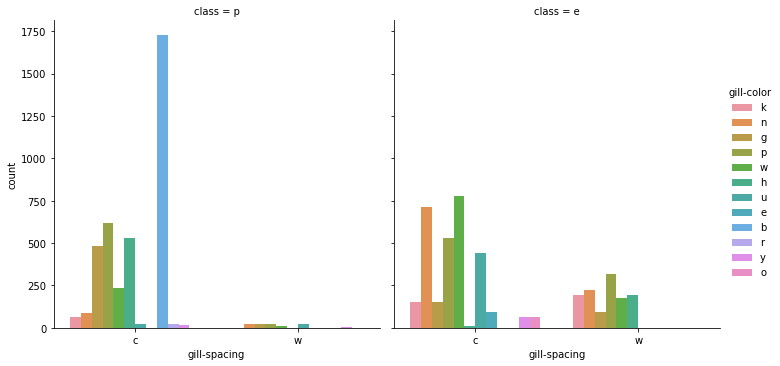

In [37]:
sns.catplot(x="gill-spacing",hue="gill-color",col="class",data=df,kind="count")

We can say that if gill-spacing is c:close and gill-color is b:buff then mushroom is highly poisionous to eat.

<AxesSubplot:xlabel='gill-size', ylabel='count'>

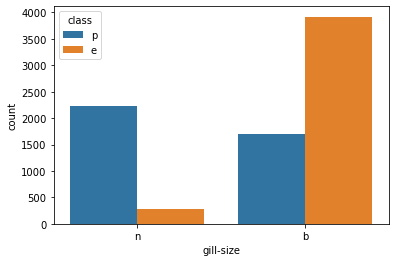

In [38]:
sns.countplot(x="gill-size",hue="class",data=df)

If the Gill-size is b:broad then its highly edible to eat.

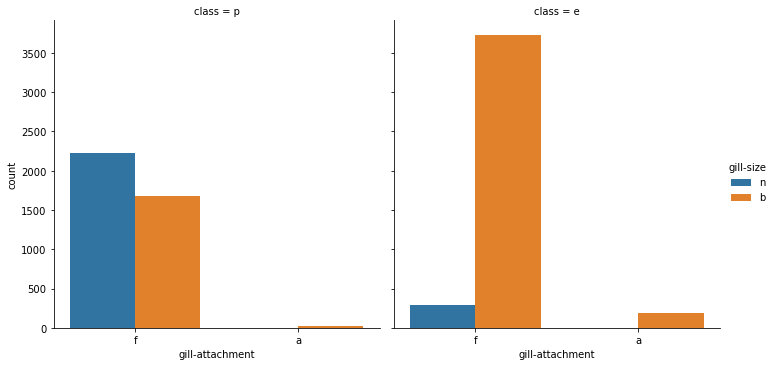

In [39]:
sns.catplot(x="gill-attachment",hue="gill-size",col="class",data=df,kind="count")

If the Gill-size is b:broad and gill-attachment is f:free we can say that mushroom is highly recommended to eat.

<AxesSubplot:xlabel='stalk-root', ylabel='count'>

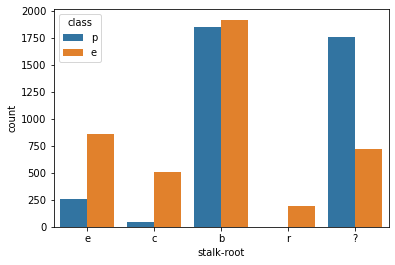

In [40]:
sns.countplot(x="stalk-root",hue="class",data=df)

In [41]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [42]:
df["stalk-root"] = df["stalk-root"].str.replace('?', 'b') #replacing the missing value with mode of the variable.

In [43]:
df['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

<AxesSubplot:xlabel='stalk-root', ylabel='count'>

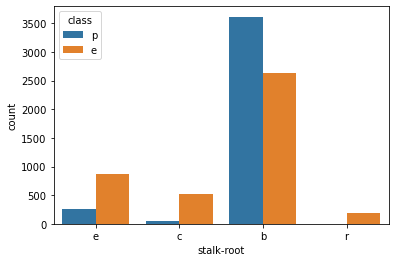

In [44]:
sns.countplot(x="stalk-root",hue="class",data=df)

if the stalk root id bulbous then it is highly poisionous to eat.

<AxesSubplot:xlabel='stalk-surface-below-ring', ylabel='count'>

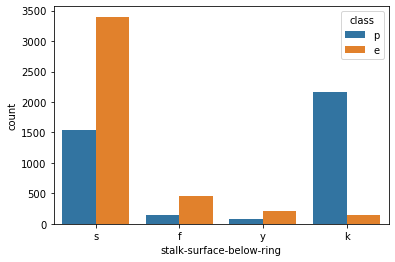

In [45]:
sns.countplot(x="stalk-surface-below-ring",hue="class",data=df)

If the stalk surface below ring is k:silky it is poisionous to eat the mushroom.

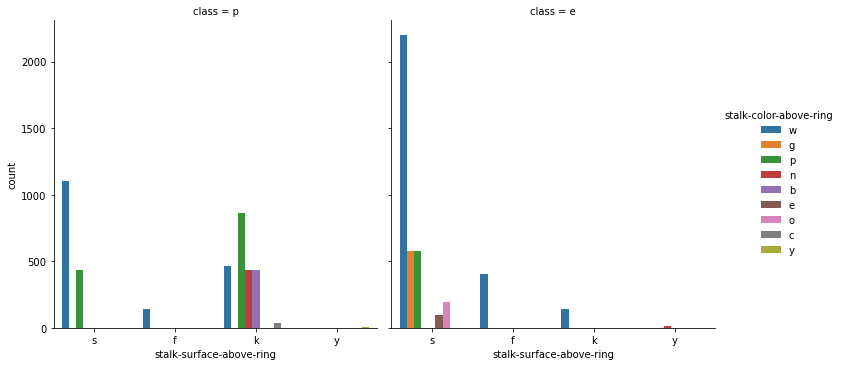

In [46]:
sns.catplot(x="stalk-surface-above-ring",hue="stalk-color-above-ring",col="class",data=df,kind="count")

If the stalk surface above the ring is s:smooth and the color of the stalk above the ring is w:white then it is 
highly recommended for eating.

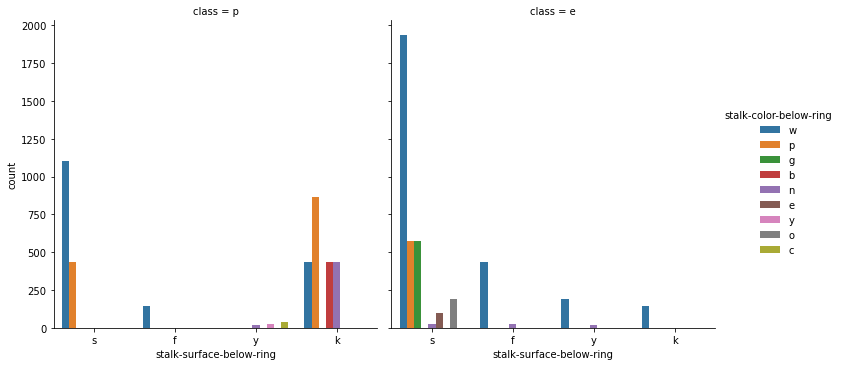

In [47]:
sns.catplot(x="stalk-surface-below-ring",hue="stalk-color-below-ring",col="class",data=df,kind="count")

If the stalk surface below the ring is s:smooth and the color of stalk below the ring is w:white it is highly edible for eating.

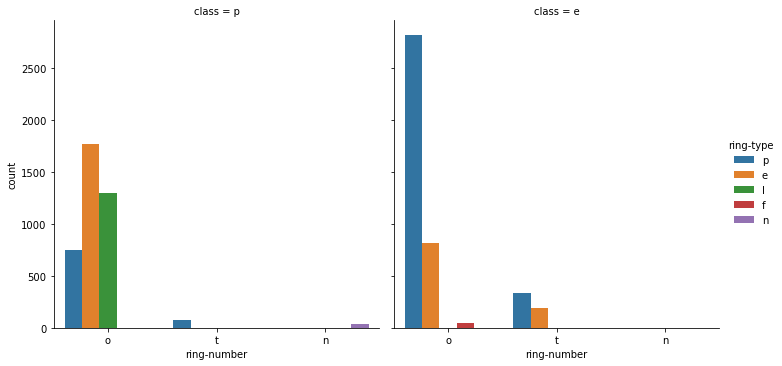

In [49]:
sns.catplot(x="ring-number",hue="ring-type",col="class",data=df,kind="count")


If the rings number is o:one and the ring type is p:pendant then it is highly recommended for eating.

<AxesSubplot:xlabel='spore-print-color', ylabel='count'>

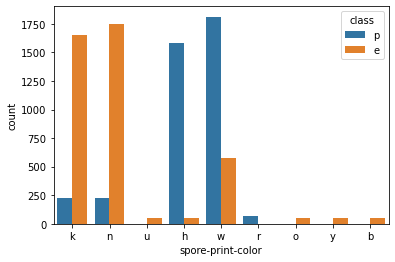

In [50]:
sns.countplot(x="spore-print-color",hue="class",data=df)

### Data Preprocessing/Cleaning

In [51]:
le=LabelEncoder()

name=["class","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root",
      "stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"]
for val in name:
    df[val]=le.fit_transform(df[val].astype(str))


In [52]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


As the whole data was of string type we have to convert each into numeric type so we did Label Encoding of each column.

In [53]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [54]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  1.706938
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

As in the dataset each variable/column is of category type we can say that there is no posibility of any outliers and there will any possibility of data being skewed.

<AxesSubplot:>

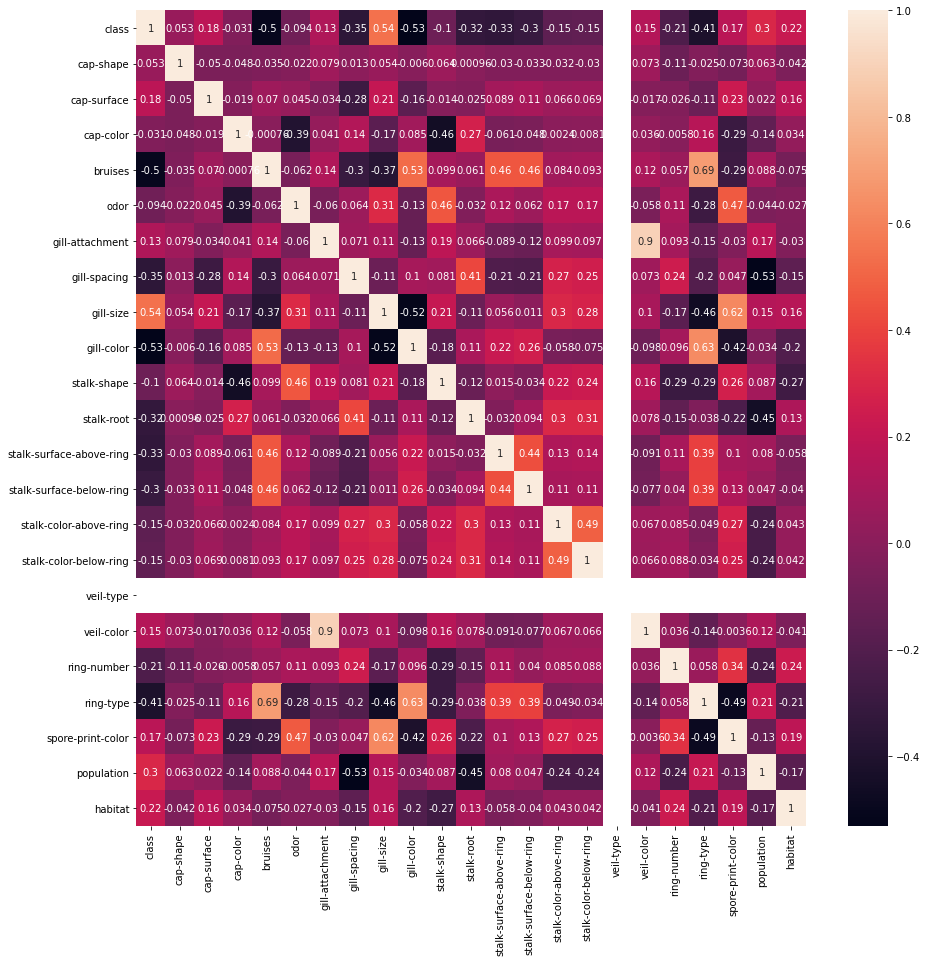

In [55]:
mplt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [56]:
df.shape

(8124, 23)

### Dividing the Dataset into the X: input(independent) and Y:output(dependent)

In [57]:
x=df.iloc[:,1:]
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [58]:
x.shape

(8124, 22)

In [59]:
y=df.iloc[:,0]
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [60]:
y.shape

(8124,)

### VIF calculation

In [61]:
def cal_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [62]:
cal_vif(x)

,variables,VIF FACTOR
0,cap-shape,5.458568
1,cap-surface,3.912686
2,cap-color,5.952369
3,bruises,7.861741
4,odor,8.930461
5,gill-attachment,254.816549
6,gill-spacing,4.210274
7,gill-size,5.550818
8,gill-color,6.290826
9,stalk-shape,9.063512


In [63]:
df.drop(["veil-color"],axis=1,inplace=True)

In [64]:
df.drop(["veil-type"],axis=1,inplace=True)

In [65]:
x=df.iloc[:,1:]
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,1,0,7,4,2


In [66]:
cal_vif(x)

,variables,VIF FACTOR
0,cap-shape,5.409470
1,cap-surface,3.855998
2,cap-color,5.849086
3,bruises,7.277039
4,odor,8.875590
5,gill-attachment,52.750073
6,gill-spacing,4.195572
7,gill-size,5.431952
8,gill-color,6.073824
9,stalk-shape,9.004247


Here we can see that by droping the veil-color the vif of gill-attachment has reduced to much extent.

### Performing Algorithms

In [67]:
maxacc=0  #finding the best random state
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxacc:
        maxacc=accu
        maxrs=i
print("best accuracy is",round(maxacc,2),"at random state",maxrs)

best accuracy is 0.96 at random state 54


In [68]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=.30,random_state=122)

### 1: Logistic Regression

In [69]:
lm.fit(x_train1,y_train1)
pred=lm.predict(x_test1)
ac=accuracy_score(y_test1,pred)
print("accuracy score",ac)
clas=classification_report(y_test1,pred)
print(clas)

accuracy score 0.9524200164068909
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1234
           1       0.96      0.94      0.95      1204

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



### 2: DecisionTreeClassifier

In [70]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)
pred=dtc.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1234
           1       1.00      1.00      1.00      1204

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### 3: Support Vector Classifier

In [71]:
ker=["rbf","poly","linear"]
for i in ker:
    svc=SVC(kernel=i)
    svc.fit(x_train1,y_train1)
    pred=svc.predict(x_test1)
    print(i,accuracy_score(y_test1,pred))
    print(i,classification_report(y_test1,pred))

rbf 0.9897456931911403
rbf               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1234
           1       1.00      0.98      0.99      1204

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

poly 0.9971287940935193
poly               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1234
           1       1.00      0.99      1.00      1204

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

linear 0.9696472518457753
linear               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1234
           1       0.98      0.96      0.97      1204

    accuracy                           0.97      2438
   macro avg       0.97      0.97      

In [72]:
svc1=SVC(kernel="poly")
svc1.fit(x_train1,y_train1)
pred=svc1.predict(x_test1)
print("Accuracy score",accuracy_score(y_test1,pred))
print(classification_report(y_test1,pred))

Accuracy score 0.9971287940935193
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1234
           1       1.00      0.99      1.00      1204

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### 4: MultinomialNB

In [73]:
mnb=MultinomialNB()
mnb.fit(x_train1,y_train1)
pred=mnb.predict(x_test1)
print("Accuracy score",accuracy_score(y_test1,pred))
print(classification_report(y_test1,pred))

Accuracy score 0.8215750615258408
              precision    recall  f1-score   support

           0       0.76      0.95      0.84      1234
           1       0.93      0.69      0.79      1204

    accuracy                           0.82      2438
   macro avg       0.84      0.82      0.82      2438
weighted avg       0.84      0.82      0.82      2438



### 5: RandomForestClassifier

In [74]:
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)
pred=rf.predict(x_test1)
print(accuracy_score(y_test1,pred))
print(classification_report(y_test1,pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1234
           1       1.00      1.00      1.00      1204

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### Cross Validation Score of each algorithm

In [75]:
print(cross_val_score(rf,x,y,cv=5).mean()) #RandomForestClassifier

0.8886894278135656


In [76]:
print(cross_val_score(mnb,x,y,cv=5).mean()) #MultinomialNB

0.7416224327396741


In [77]:
print(cross_val_score(dtc,x,y,cv=5).mean()) #DecisionTreeClassifier

0.9143002652519894


In [78]:
print(cross_val_score(lm,x,y,cv=5).mean()) #Logistic Regression

0.8685267146646456


In [79]:
print(cross_val_score(svc1,x,y,cv=5).mean()) #Support Vector Classifier

0.8515083743842364


In [104]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)
pred=dtc.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("Accuracy Score\t",az)
cl=classification_report(y_test1,pred)
print("Confusion Matrix:\n",confusion_matrix(y_test1,pred))
print("Classification Report: \n",cl)

Accuracy Score	 1.0
Confusion Matrix:
 [[1234    0]
 [   0 1204]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1234
           1       1.00      1.00      1.00      1204

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### ROC_AUC SCORE

In [81]:
y_pred_prob=dtc.predict_proba(x_test1)[:,1]
y_pred_prob

array([0., 0., 1., ..., 0., 1., 1.])

In [82]:
fpr,tpr,thresholds=roc_curve(y_test1,y_pred_prob)

In [83]:
fpr

array([0., 0., 1.])

In [84]:
tpr

array([0., 1., 1.])

In [85]:
thresholds

array([2., 1., 0.])

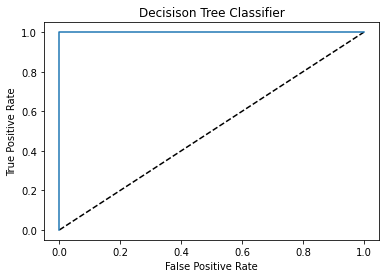

In [86]:
mplt.plot([0,1],[0,1],"k--")
mplt.plot(fpr,tpr,label="DecisionTreeClassifier")
mplt.xlabel("False Positive Rate")
mplt.ylabel("True Positive Rate")
mplt.title("Decisison Tree Classifier")
mplt.show()

In [87]:
auc_score=roc_auc_score(y_test1,dtc.predict(x_test1))
auc_score

1.0

Graphical representation of the accuracy score at different thresholds value.
Roc_auc_score is almost equivalent to the accuracy score of the model.

### Hyper Parameter Tunning for DecisionTreeCalssifier

In [88]:
parameter={"criterion":['gini','entropy'],
          "splitter":['best','random'],
          "max_features":["auto","sqrt","log2"],
          "min_samples_split":np.arange(2,20),
          "max_depth":np.arange(2,10)}

In [89]:
gcv=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [90]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'splitter': ['best', 'random']})

In [91]:
gcv.best_params_        #finding out the best parameters

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 19,
 'splitter': 'best'}

### Final Model with Best Parameters

In [97]:
final=DecisionTreeClassifier(criterion="gini",max_depth=9,max_features="log2",min_samples_split=19,splitter="best")
final.fit(x_train1,y_train1)
pred=final.predict(x_test1)
acc=accuracy_score(y_test1,pred)
acc1=acc*100
print("Accuracy Score",acc1)
print(classification_report(y_test1,pred))
print(confusion_matrix(y_test1,pred))

Accuracy Score 99.87694831829369
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1234
           1       1.00      1.00      1.00      1204

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

[[1231    3]
 [   0 1204]]


### Saving the model

In [93]:
import joblib

In [94]:
joblib.dump(final,"finalmod.pkl")

['finalmod.pkl']